In [1]:
from sspike.supernova import Supernova
from sspike.detectors import Detector

In [2]:
tam = 'Tamborra_2014'
tam_prog = {'mass': 27.0}

nak ="Nakazato_2013"
nak_prog = {'mass': 20,
            'metal': 0.02,
            't_rev': 300}

transformation = 'NoTransformation'
distance = 10.0

t_bins = 20
t_start = 0.0105
t_end = 0.55

sn1 = Supernova(tam, tam_prog, transformation, distance, t_bins, t_start, t_end)
sn2 = Supernova(nak, nak_prog, transformation, distance, t_bins, t_start, t_end)

kam = Detector('kamland')

In [3]:
from sspike import beer

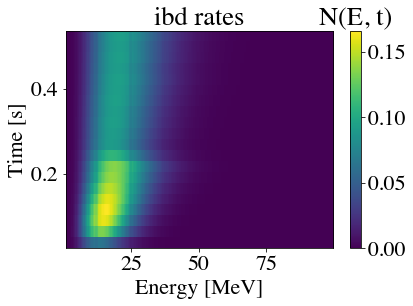

In [5]:
beer.plot_N_chan(sn1, kam, 'ibd')

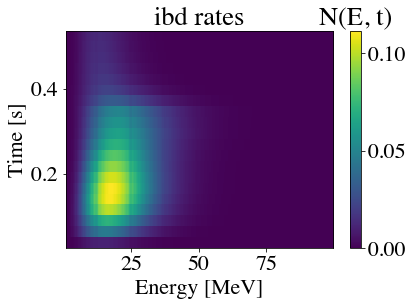

In [6]:
beer.plot_N_chan(sn2, kam, 'ibd')

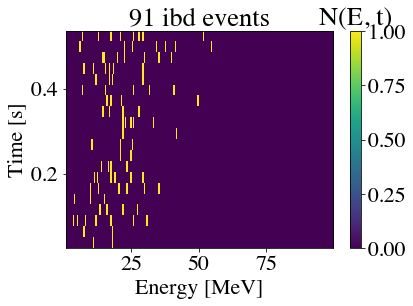

In [7]:
beer.plot_N_chan(sn1, kam, 'ibd', events=True)

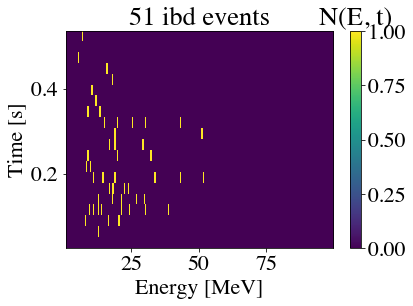

In [8]:
beer.plot_N_chan(sn2, kam, 'ibd', events=True)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
chan = 'ibd'
N_tam = pd.read_csv(f"{kam.get_save_dir(sn1)}/N_{chan}.csv", sep=" ", index_col=0)
N_nak = pd.read_csv(f"{kam.get_save_dir(sn2)}/N_{chan}.csv", sep=" ", index_col=0)

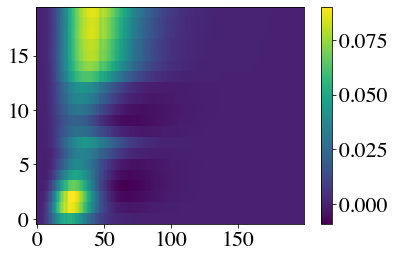

In [55]:
plt.imshow(
        N_tam - N_nak,
        origin="lower",
        aspect="auto",
        interpolation="none",
    )
plt.colorbar()
plt.show()

In [71]:
rand1 = sn1.random_df()
rand2 = sn1.random_df()

In [72]:
N_tam.columns = rand1.columns
N_tam.index = rand1.index
N_nak.columns = rand1.columns
N_nak.index = rand1.index

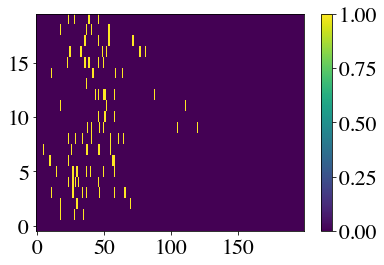

In [317]:
plt.imshow(
        rand1 > np.exp(-N_tam),
        origin="lower",
        aspect="auto",
        interpolation="none",
    )
plt.colorbar()
plt.show()

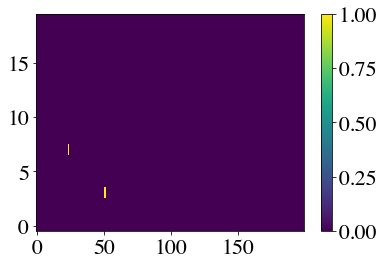

In [330]:
plt.imshow(
        sn2.random_df() > N_nak * np.exp(-N_nak) + np.exp(-N_nak),
        origin="lower",
        aspect="auto",
        interpolation="none",
    )
plt.colorbar()
plt.show()

In [342]:
N_tam_exp = np.sum(np.sum(N_tam))
N_nak_exp = np.sum(np.sum(N_nak))
N_tam_exp, N_nak_exp

(92.70924872516238, 50.03598303451736)

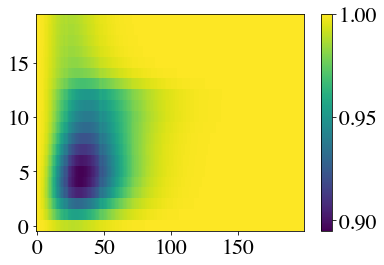

In [377]:
plt.imshow(
        np.exp(-N_nak),
        origin="lower",
        aspect="auto",
        interpolation="none",
    )
plt.colorbar()
plt.show()

In [374]:
Nak_rand1 = sn1.random_df() > np.exp(-N_nak)
Nak_rand2 = sn1.random_df() > np.exp(-N_nak)
Tam_rand1 = sn1.random_df() > np.exp(-N_tam)
Tam_rand2 = sn1.random_df() > np.exp(-N_tam)

In [375]:
Nak_N1_obs = N_nak.where(Nak_rand1)
Nak_N2_obs = N_nak.where(Nak_rand2)
Tam_N1_obs = N_nak.where(Tam_rand1)
Tam_N2_obs = N_nak.where(Tam_rand2)
l_nak1 = np.sum(np.sum(np.log(Nak_N1_obs)))
l_nak2 = np.sum(np.sum(np.log(Nak_N2_obs)))
l_tam1 = np.sum(np.sum(np.log(Tam_N1_obs)))
l_tam2 = np.sum(np.sum(np.log(Tam_N2_obs)))

In [376]:
L_nak1 = l_nak1 - N_nak_exp
L_nak2 = l_nak2 - N_nak_exp
L_tam1 = l_tam1 - N_tam_exp
L_tam2 = l_tam2 - N_tam_exp
L_nak1, L_nak2, L_tam1, L_tam2


(-205.828893875019,
 -205.30904043309704,
 -420.40286513146157,
 -499.0511819805238)